<a href="https://colab.research.google.com/github/abhimshnew/Credit-Card-Fraud/blob/master/Credit_card_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Fraud detection
1. Explore the data
2. Figure import feature
3. Perform Machine Learning

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [0]:
from google.colab import files


In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhimshm","key":"852887340af85c7779cafbf907659999"}'}

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c ieee-fraud-detection

 78% 41.0M/52.5M [00:00<00:00, 42.6MB/s]
100% 52.5M/52.5M [00:00<00:00, 76.9MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 92.9MB/s]
100% 47.3M/47.3M [00:00<00:00, 79.2MB/s]

  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 202MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 76.4MB/s]


In [0]:
!ls

kaggle.json		   test_identity.csv.zip     train_transaction.csv.zip
sample_data		   test_transaction.csv.zip
sample_submission.csv.zip  train_identity.csv.zip


In [0]:
train_identity = pd.read_csv('/content/test_identity.csv.zip', compression='zip')
train_transaction = pd.read_csv('/content/train_transaction.csv.zip', compression='zip')

test_identity = pd.read_csv('/content/test_identity.csv.zip', compression='zip')
test_transaction = pd.read_csv('/content/test_transaction.csv.zip', compression='zip')

# Get the dataset which similar transaction id.i.e 
# Combine the columns that have only transaction ID in both dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID')


In [8]:
print(f'Shape of train data: {train.shape}')
print(f'Shape of test data: {test.shape}')


Shape of train data: (590540, 434)
Shape of test data: (141907, 433)


In [9]:
train.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

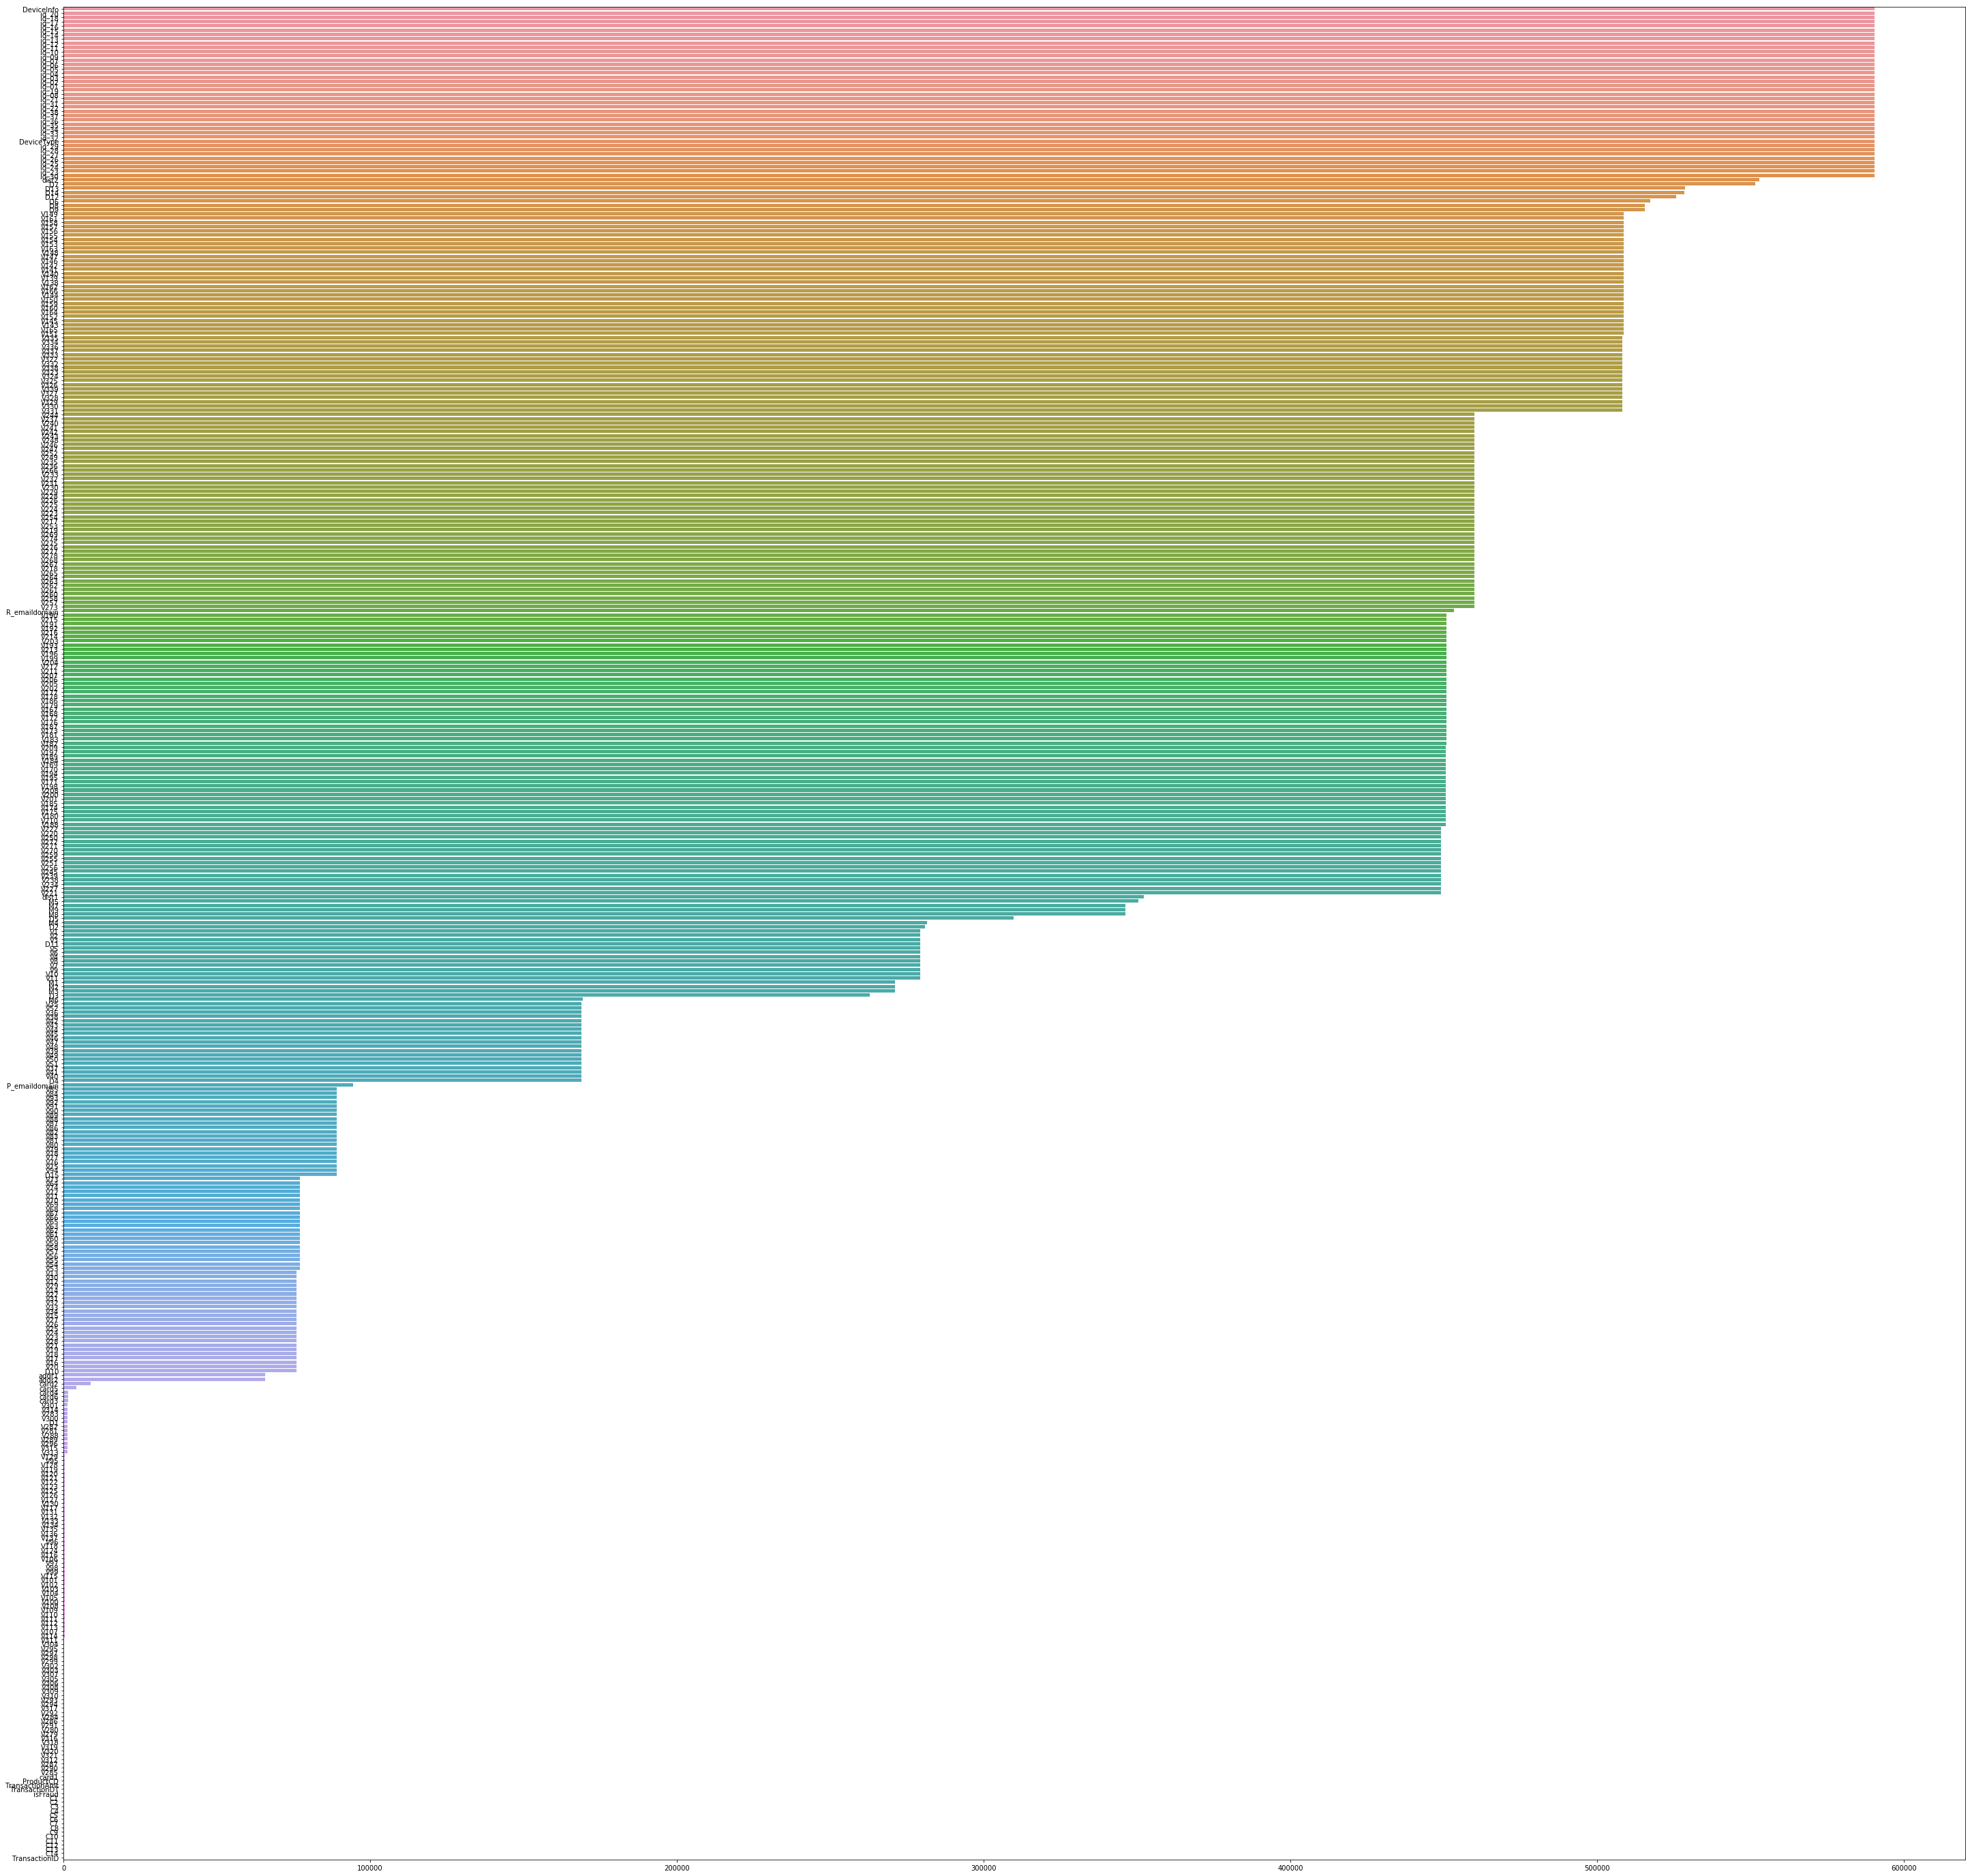

In [0]:
plt.figure(figsize=(50,50))
sns.barplot(train.isnull().sum().sort_values(ascending=False),
            train.isnull().sum().sort_values(ascending=False).index)
plt.show()

In [0]:
cols_with_max_Nan =  [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]

In [0]:
cols_with_max_Nan

['dist2',
 'D7',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

From above analysis we see that some columns have more than 90 % data as Nan, Hence we need to remove themn from the dataset

In [0]:
train_new = train.drop(columns=cols_with_max_Nan, axis = 1)

In [12]:
train.shape

(590540, 434)

In [13]:
train_new.shape

(590540, 392)

We have currently removed 42 columns as 90% data was Nan in Columns, If the Columns have a singlr value for than single value they also need to deleted

In [0]:
maximum_data_for_each_columns = [col for col in train_new.columns if train_new[col].value_counts(dropna=False, normalize=True).values[0] > 0.90]

In [0]:
for i in maximum_data_for_each_columns:
    print(f'{i} \n {train_new[i].value_counts().head(5)}\n\n')

isFraud 
 0    569877
1     20663
Name: isFraud, dtype: int64


C3 
 0.0    588111
1.0      2137
2.0       180
3.0        58
4.0         7
Name: C3, dtype: int64


V98 
 0.0    558622
1.0     27768
2.0      3058
3.0       568
4.0       135
Name: V98, dtype: int64


V101 
 0.0    556214
1.0     19797
2.0      6803
3.0      2995
4.0      1379
Name: V101, dtype: int64


V102 
 0.0    535961
1.0     24472
2.0     10448
3.0      5439
4.0      3227
Name: V102, dtype: int64


V103 
 0.0    547743
1.0     21363
2.0      8399
3.0      4117
4.0      2268
Name: V103, dtype: int64


V104 
 0.0     563527
1.0      19375
2.0       4089
3.0       1126
11.0      1000
Name: V104, dtype: int64


V105 
 0.0    547750
1.0     27711
2.0      7508
3.0      2566
4.0      1103
Name: V105, dtype: int64


V106 
 0.0    558074
1.0     22306
2.0      5381
3.0      1590
4.0       595
Name: V106, dtype: int64


V107 
 1.0    589978
0.0       248
Name: V107, dtype: int64


V108 
 1.0    587242
2.0      2566
0.0     

In [0]:
len(maximum_data_for_each_columns)

55

In [0]:
for each in train_new.columns:
    print(each)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167
V168
V16

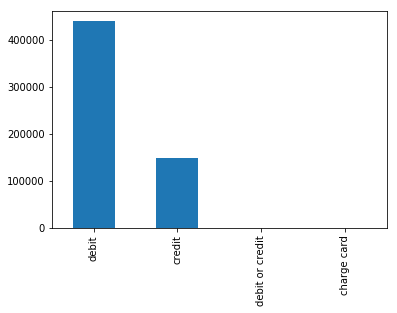

In [17]:
#plotting id_12
pd.value_counts(train_new['card6']).plot.bar()

The card6 feauture might refer to the Card Type

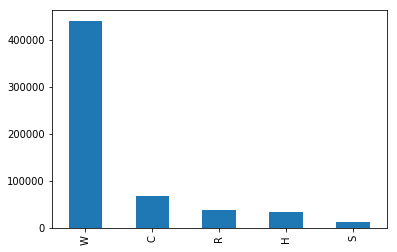

In [15]:
#Plotting the ProductCD
pd.value_counts(train_new['ProductCD']).plot.bar()

In [0]:
train_new.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=404)

In [18]:
train_new['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64


**From the above analysis, we see that the data is highly imbalanced.If we train the model with this data then there is a chance that model might be biased towards not Fraud**

In [0]:
train_new.fillna(-999, inplace=True)

In [0]:
#Need to encode all the column data into number
from sklearn.preprocessing import LabelEncoder
for each_column in train_new.drop('isFraud', axis=1):
    if train_new[each_column].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train_new[each_column].values))
        train_new[each_column] = lbl.transform(list(train_new[each_column].values))

In [0]:
#To Test how the encoder works
lbl = LabelEncoder()
lbl.fit(list(train_new['card6'].values))
lbl.transform(list(train_new['card6'].values))

array([1, 1, 2, ..., 2, 2, 1])

In [0]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_new.drop('isFraud',axis=1),
                                                    train_new['isFraud'],
                                                    test_size=.2)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train.drop(columns='TransactionID'), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict = model.predict(x_test.drop(columns='TransactionID'))

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9648288007586276

**The Accuracy of the model is 96.5%**

In [22]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict, average='macro')

0.50352913831572

The ratio of of True_Positives to ratio of True Positives to False NEgative is 0.50